### Prophet exercise

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from fbprophet import Prophet

In [2]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [3]:
wmt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.023768,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.023678,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.023408,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.023408,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.023047,870400


In [4]:
wmt.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* use only the `Date` and `Adj Close` columns

In [5]:
wmt_f = wmt[['Date','Adj Close']]

* rename columns to fit the Prophet naming convention

In [7]:
wmt_f.columns = ['ds','y']

* convert date to datetime

In [9]:
wmt_f['ds'] = pd.to_datetime(wmt_f['ds'])

In [10]:
wmt_f.dtypes

ds    datetime64[ns]
y            float64
dtype: object

* plot time-series

<AxesSubplot:xlabel='ds'>

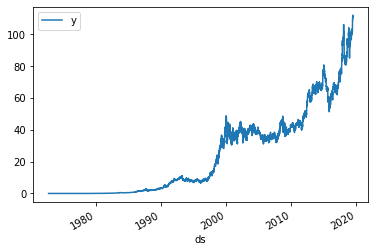

In [12]:
wmt_f.plot(x='ds', y='y')

* instantiate Prophet

In [13]:
proph = Prophet()

* fit model

In [14]:
proph.fit(wmt_f)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -562.06
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       32241.9    0.00487233        3020.2           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       33044.5      0.027196       7368.51       1.092      0.1092      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       33494.6    0.00154771       5102.87      0.2244      0.2244      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       33630.3    0.00486534       1027.22           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       33780.4     0.0267757       8361.19      0.1974           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha   

* forecast 365 values into the future 

In [15]:
future365 = proph.make_future_dataframe(periods=365)
forecast = proph.predict(future365)

* plot forecast

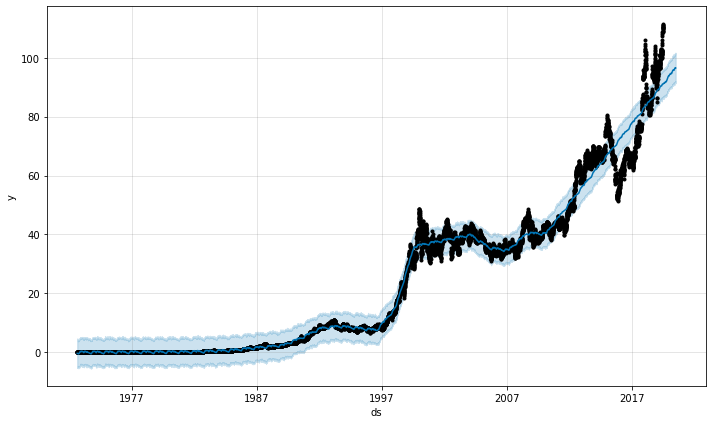

In [17]:
fig1 = proph.plot(forecast)

* plot components

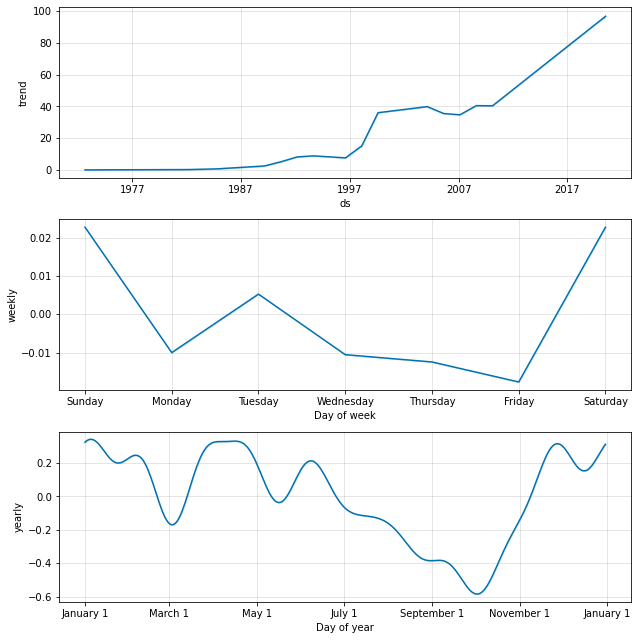

In [18]:
fig2 = proph.plot_components(forecast)

## Stretch
### Arima vs. Prophet Modeling

- Build the separate ARIMA model and compare with existing Prophet prediction. Use the last 7 values we have in the timeseries to test which approach has better predictions.